In [63]:
# Load Packages
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pylab import rcParams
import networkx.algorithms.bipartite as bi

In [64]:
df = pd.read_csv("EmailReceivers.csv")

In [65]:
df.head()

Id  EmailId  PersonId
0   1        1        80
1   2        2        80
2   3        3       228
3   4        3        80
4   5        4        80

In [66]:
# number of email receivers [affiliations]
print('Number of Email Receiver entries: ', len(df))

Number of Email Receiver entries:  9306


In [67]:
df['EmailId'] = 'E' + df['EmailId'].astype(str) # Prepend EmailId with 'E'
df['PersonId'] = 'P' + df['PersonId'].astype(str) # Prepend PersonId with 'P'
df.head()

Id EmailId PersonId
0   1      E1      P80
1   2      E2      P80
2   3      E3     P228
3   4      E3      P80
4   5      E4      P80

In [68]:
# Creating Graph object
B = nx.from_pandas_edgelist(df, source='PersonId', target='EmailId')

# Check if Graph is 'bipartite'
bi.is_bipartite(B)

True

In [69]:
# Get list of "Person ID" nodes
idp = df['PersonId'].unique()

# Get list of "Email ID" nodes
ide = df['EmailId'].unique()

### Draw email graph
* Orange hexagons represent emails
* Blue nodes represent people

#### Draw 2-node affiliation graph
plt.figure(figsize=(40,40))
pos = nx.spring_layout(B, k = 0.7) # Calculate layout
edg = nx.draw_networkx_edges(B, pos, width = 3, alpha = 0.2)
pnd = nx.draw_networkx_nodes(B, pos, nodelist=ide, node_color = "#ff7f27", node_shape = "h", node_size = 2000)
cnd = nx.draw_networkx_nodes(B, pos, nodelist=idp, node_color = "#9f9fff", node_size = 2000)
lbl = nx.draw_networkx_labels(B, pos)

#### Person-to-person Graph

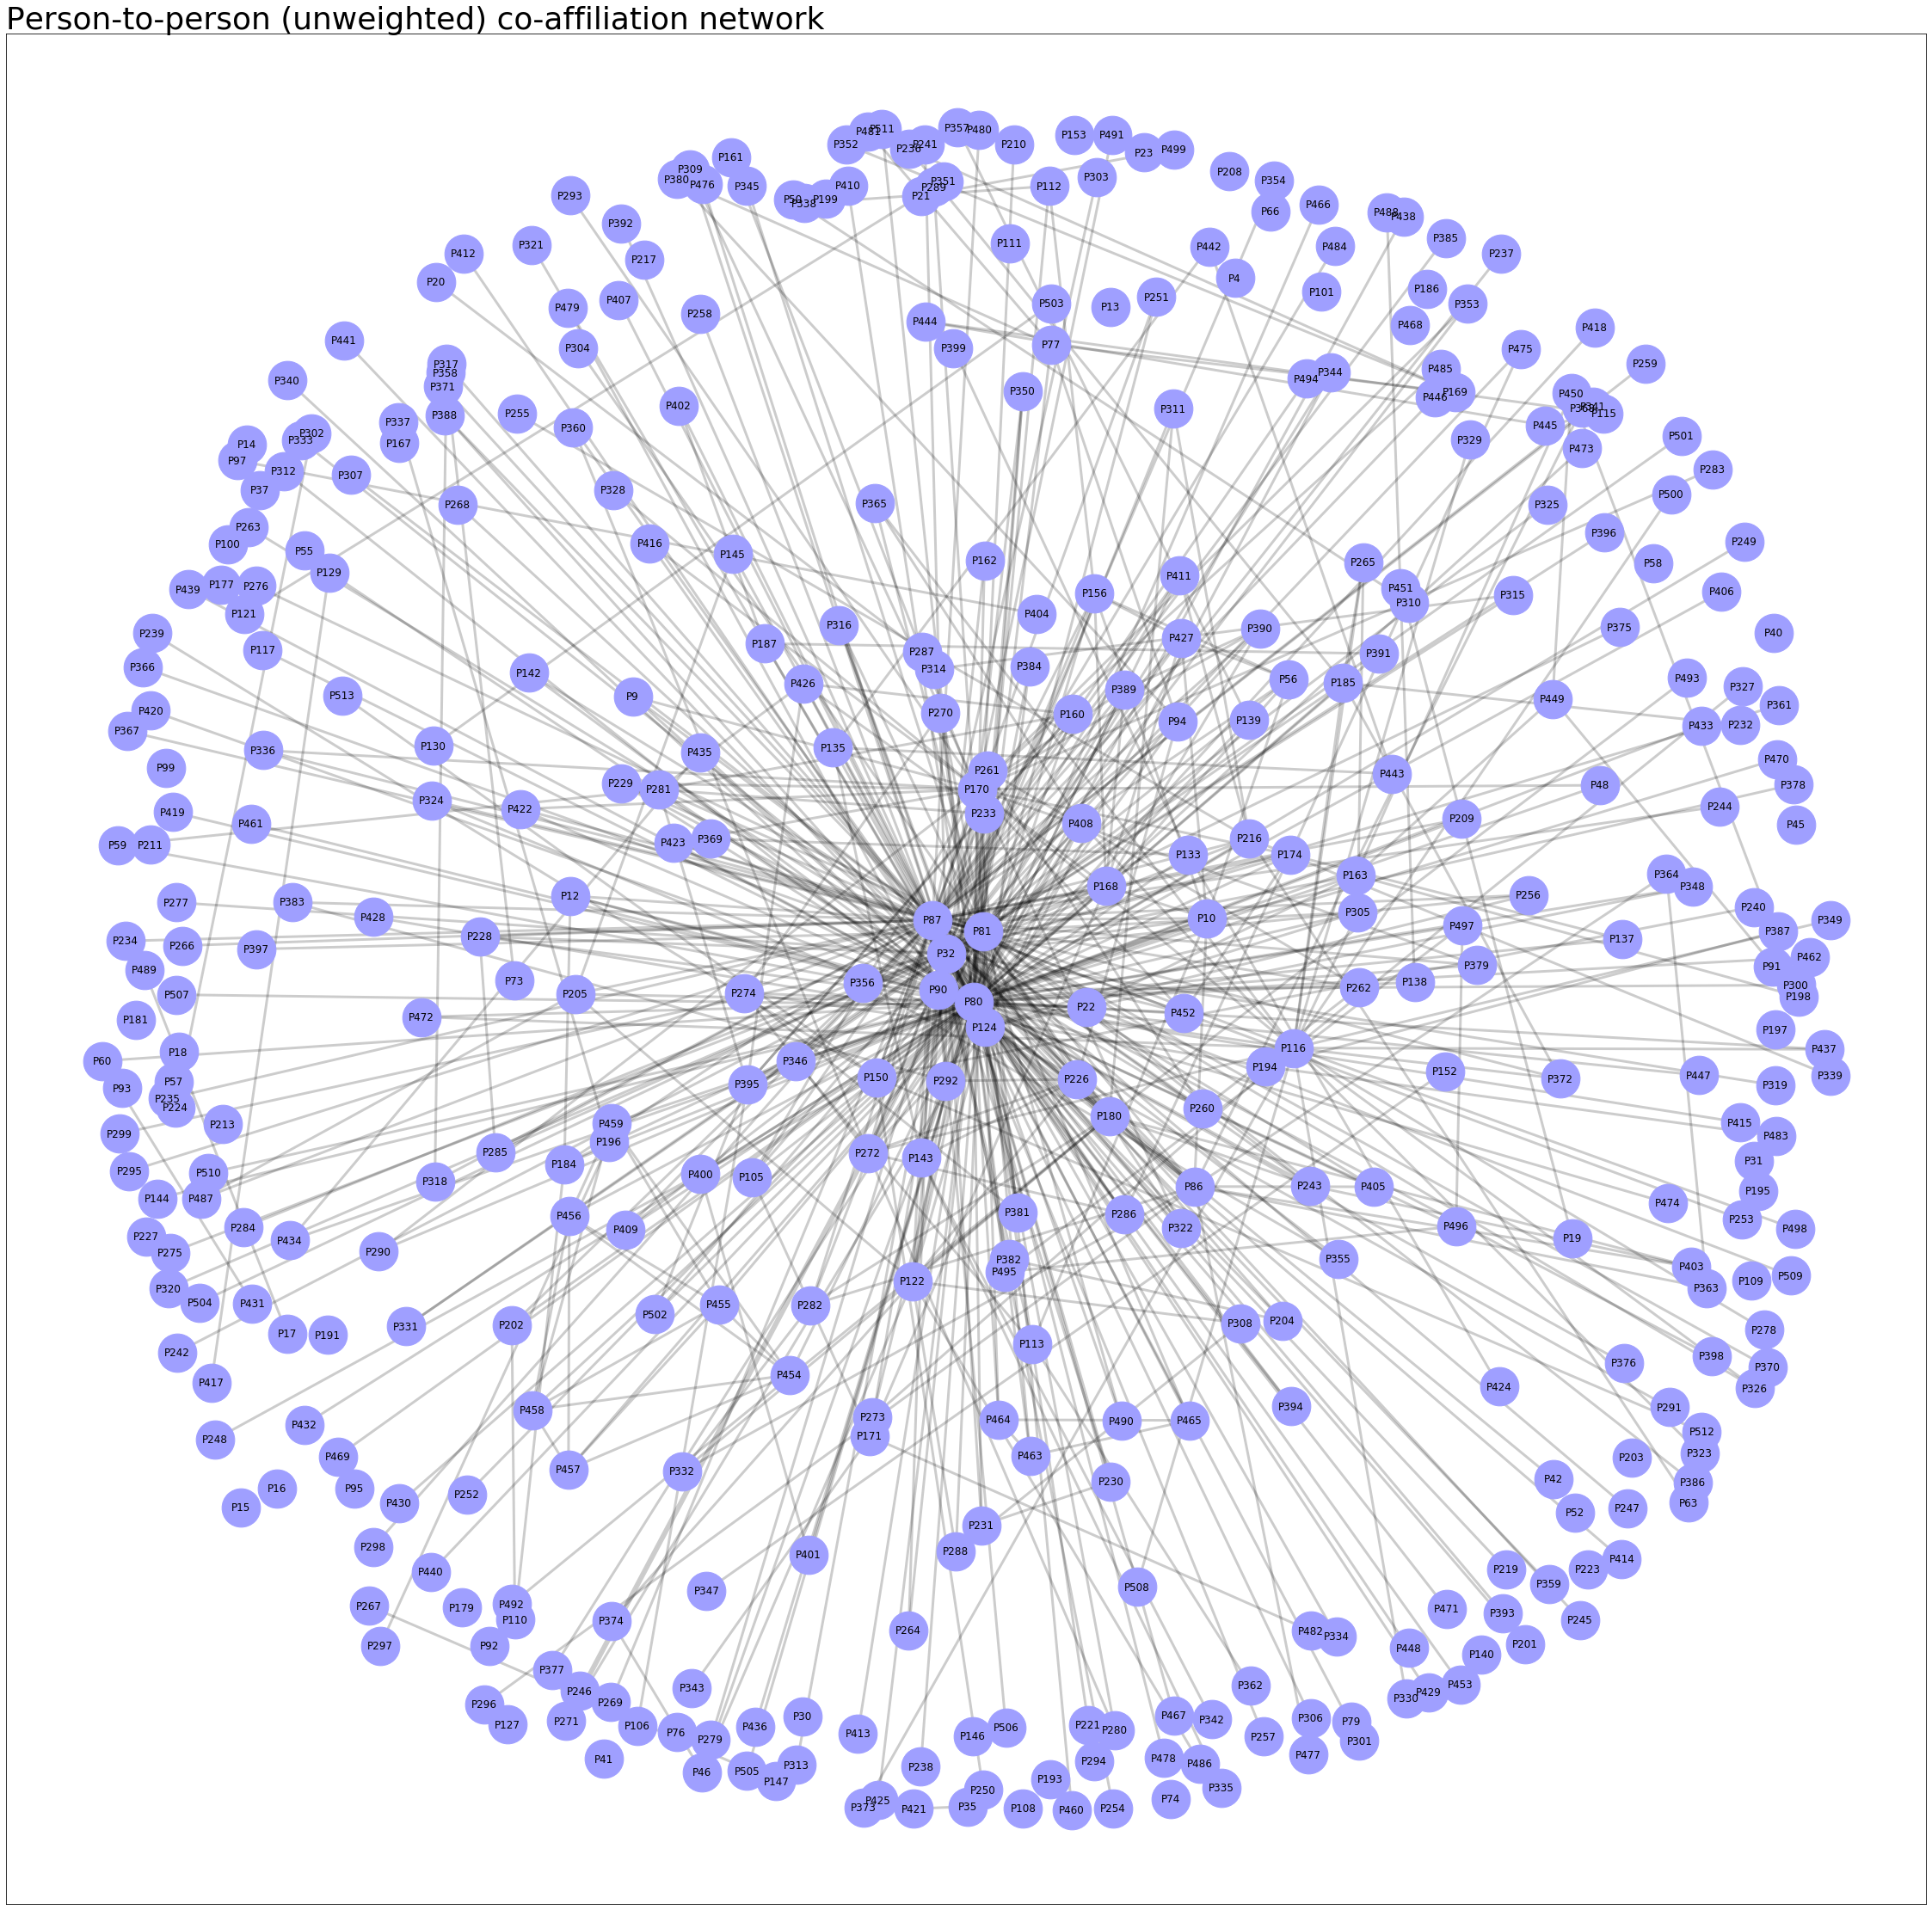

In [70]:
# Create and draw a projected graph for person-to-person network
pG = bi.projected_graph(B, idp)
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(pG, k = 0.5)
edg = nx.draw_networkx_edges(pG, pos, width = 3, alpha = 0.2)
pnd = nx.draw_networkx_nodes(pG, pos, node_color = "#9f9fff", node_size = 2000)
lbl = nx.draw_networkx_labels(pG, pos, font_size = 12)
ttl = plt.title('Person-to-person (unweighted) co-affiliation network', loc = 'left', fontsize = 36)

#### Weighted Person-to-person Graph

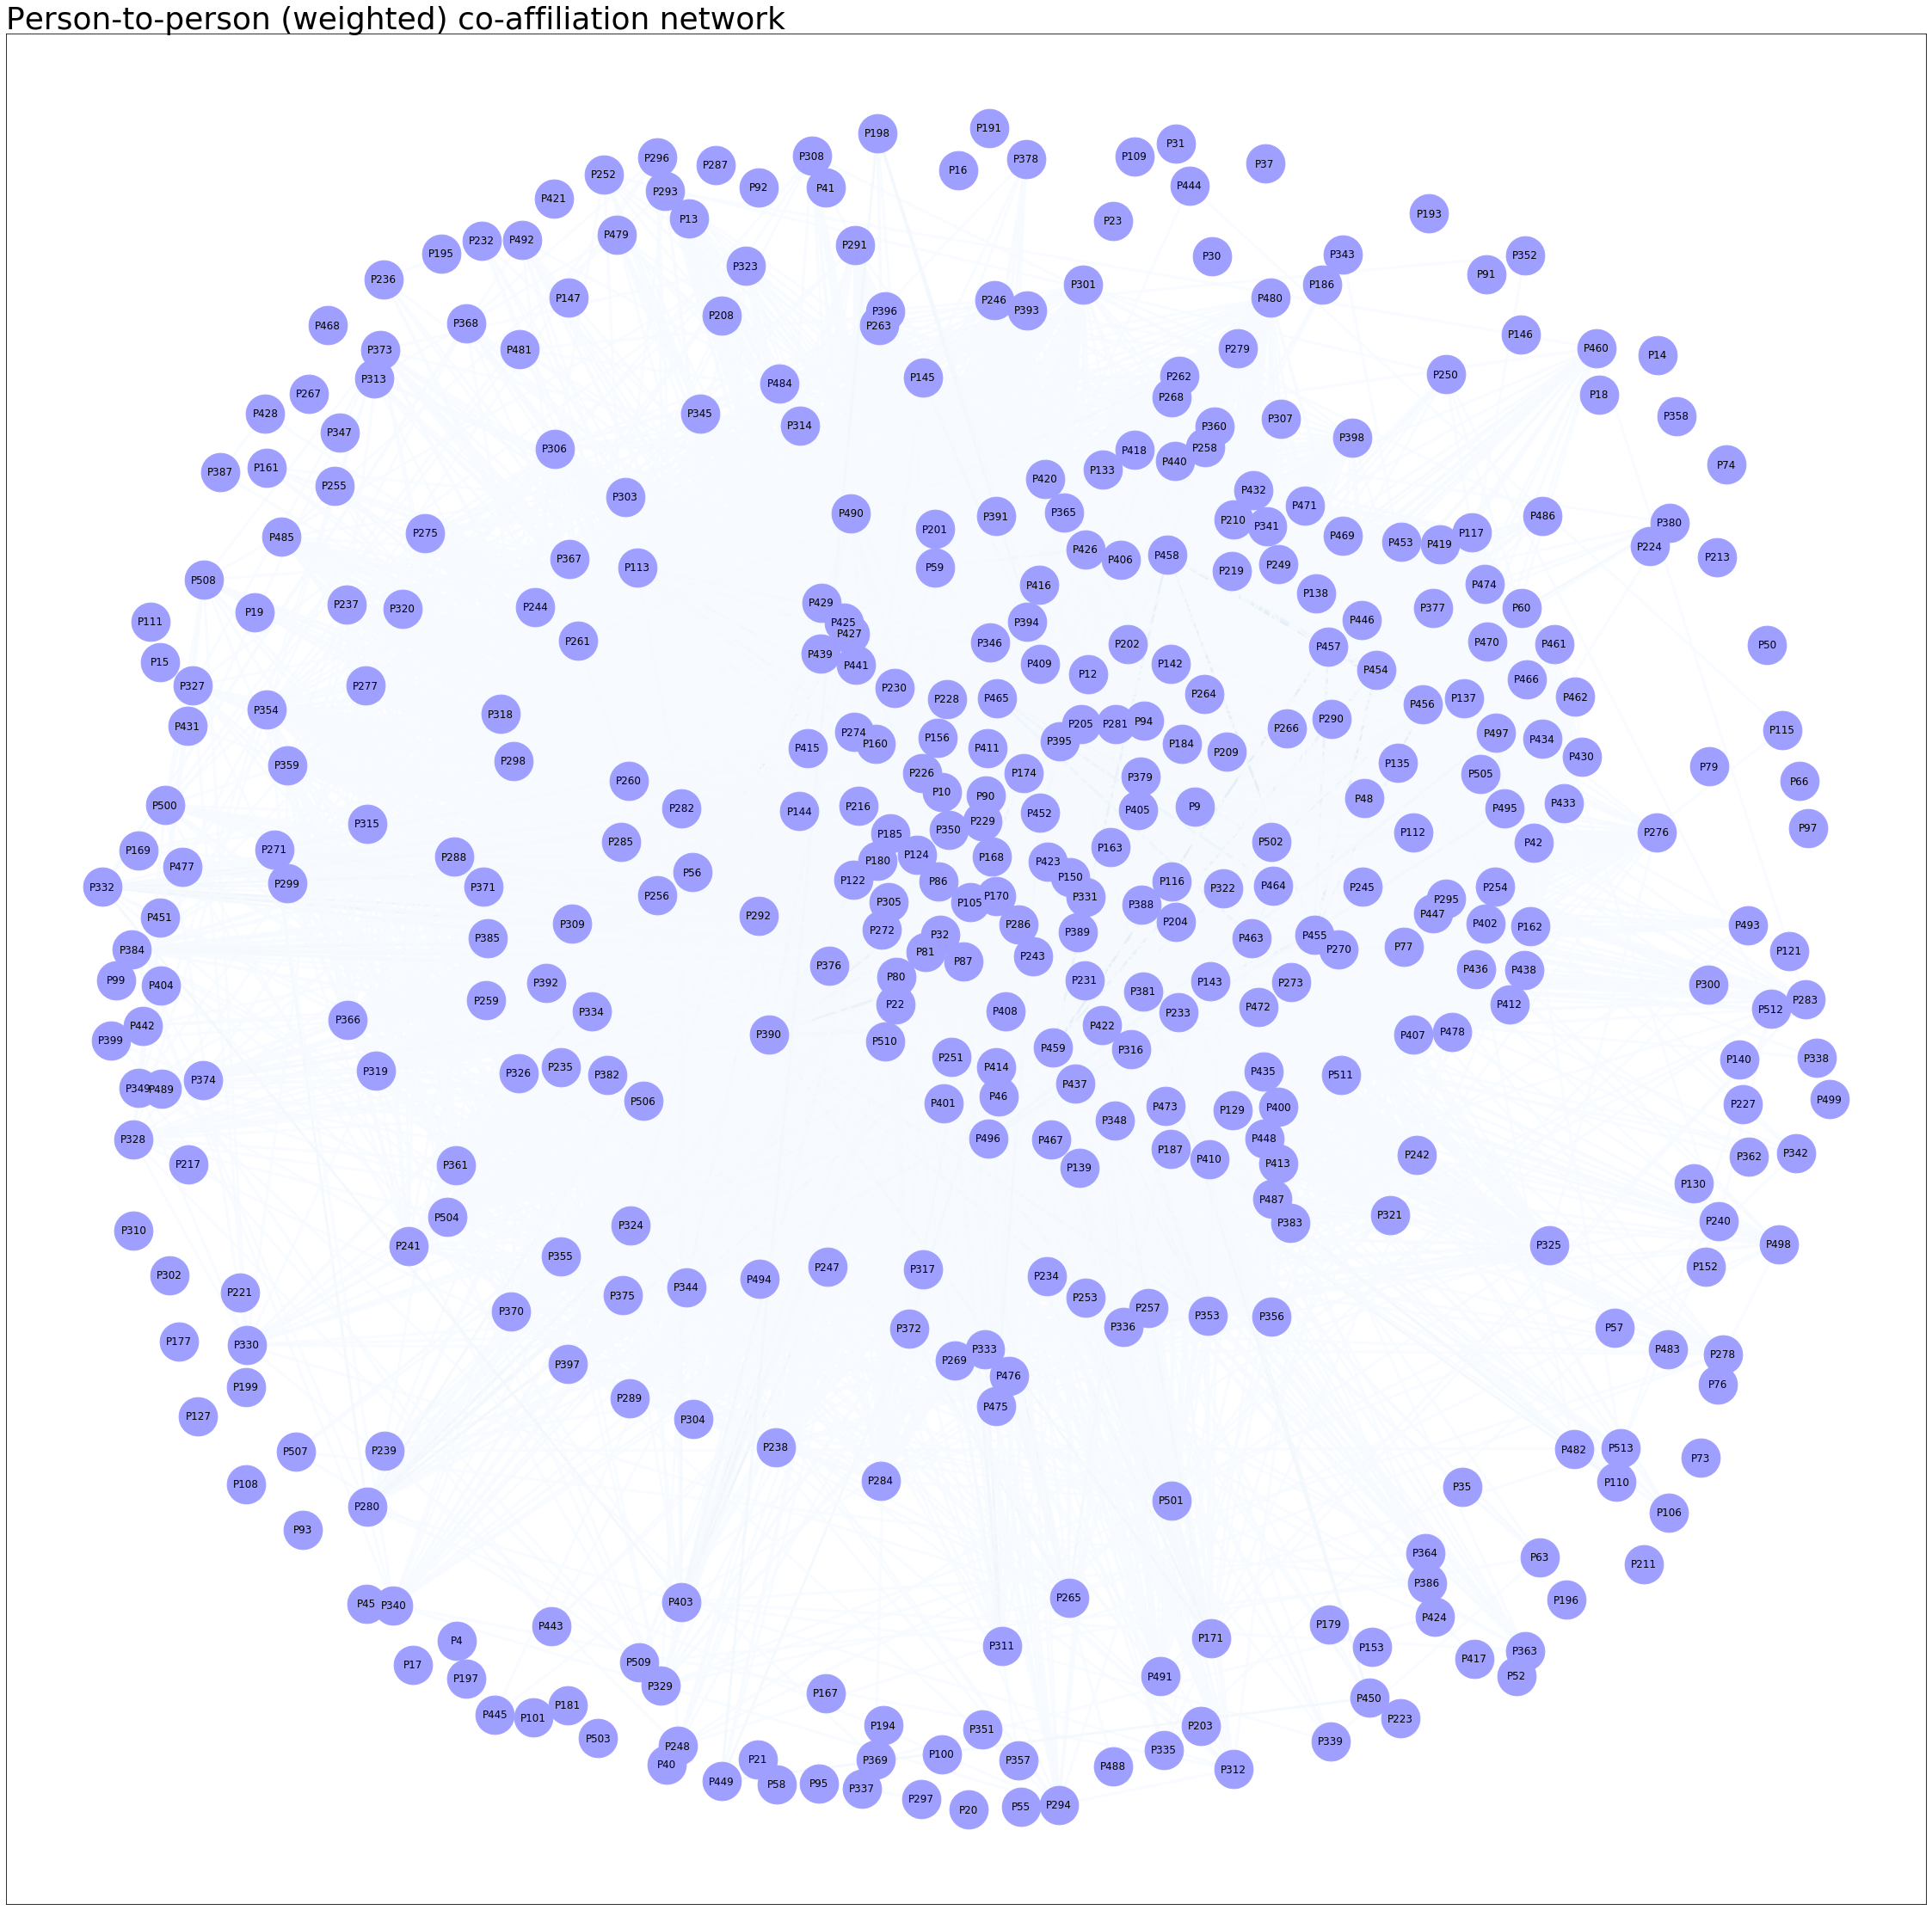

In [71]:
# Create weighted co-affiliation network
wpG = bi.weighted_projected_graph(pG, idp)

# Get weights
w = np.array([wpG.edges[e]['weight'] for e in wpG.edges])

# Create figure
plt.figure(figsize=(40,40))

# Calculate layout
pos = nx.spring_layout(wpG, k = 1.5)

# Draw edges, nodes, and labels
edg = nx.draw_networkx_edges(wpG, pos, width = 3, alpha = 0.8, edge_color = w, edge_cmap=plt.cm.Blues)
pnd = nx.draw_networkx_nodes(wpG, pos, node_color = "#9f9fff", node_size = 2000)
lbl = nx.draw_networkx_labels(wpG, pos)
ttl = plt.title('Person-to-person (weighted) co-affiliation network', loc = 'left', fontsize = 36)

#### Islands in the Network

In [72]:
'''
The ‘trim_edges’ function below takes a graph, and applies a threshold (weight), 
letting all edges above a certain value through, and removing  all others.
'''
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight = edata['weight'])
    return g2

'''
The ‘island_method’ function below will compute evenly spaced thresholds 
and produce a list of networks at each threshold level.
'''
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]
    
# This function will draw "Person-Node" graph
def plot_person_node_graph(g, fig_sz=(40, 40), node_sz = 2000, spring_layout_k = 0.5):
    plt.figure(figsize=fig_sz)
    pos = nx.spring_layout(g, k = spring_layout_k)
    edg = nx.draw_networkx_edges(g, pos, width = 3, alpha = 0.2)
    pnd = nx.draw_networkx_nodes(g, pos, node_color = "#9f9fff", node_size = node_sz)
    lbl = nx.draw_networkx_labels(g, pos, font_size = 12)

In [73]:
islands = island_method(wpG)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_components(i[1]))))

1 137 2
8 9 1
15 5 1
22 4 1
29 3 1
36 2 1


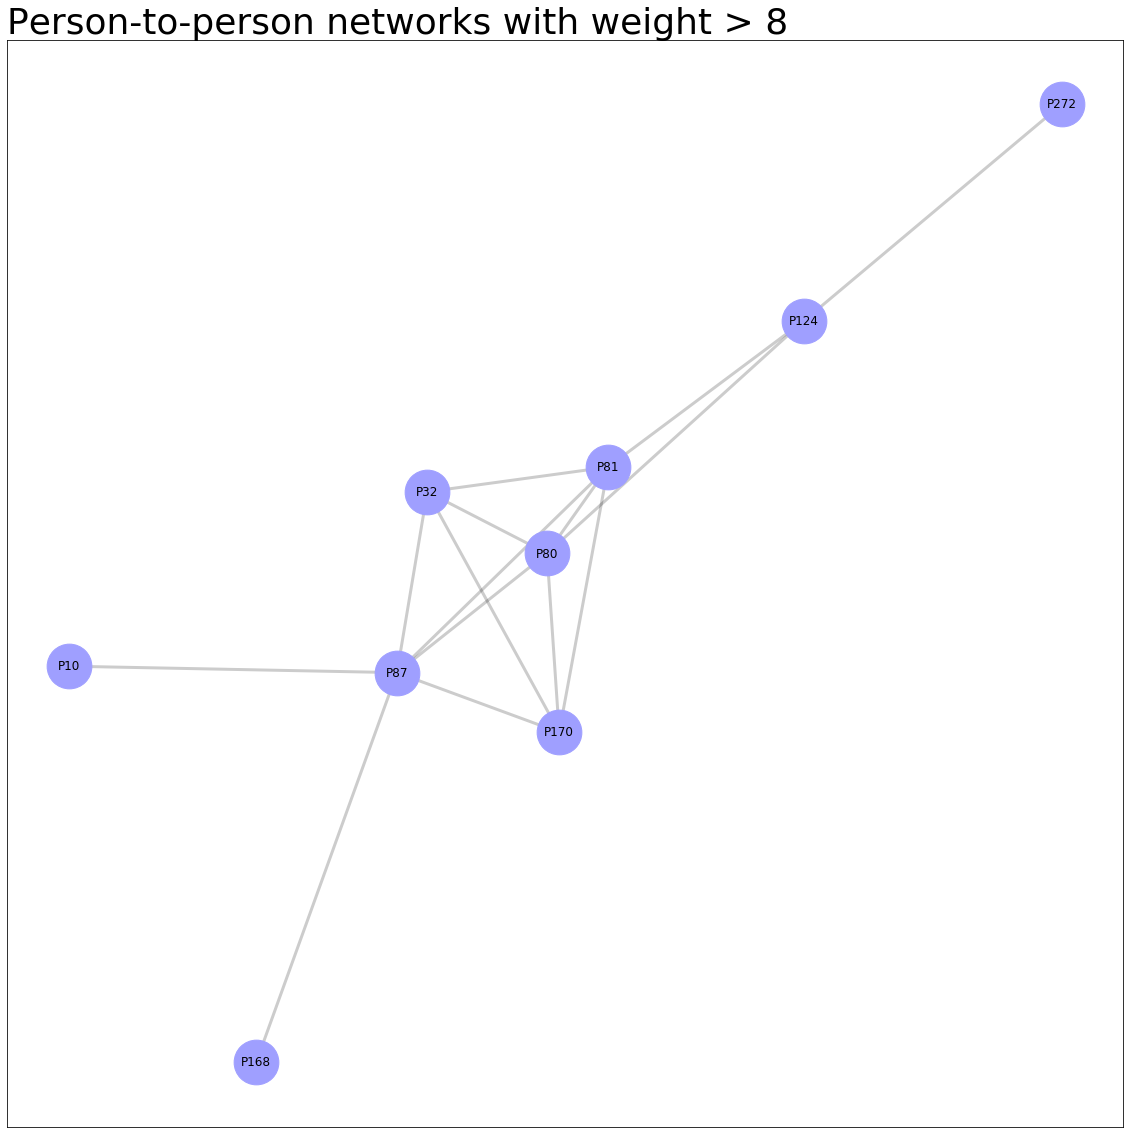

In [75]:
# Graph of islands [8 9 1]
ig = islands[1][1]
plot_person_node_graph(ig, fig_sz=(20,20))
ttl = plt.title('Person-to-person networks with weight > 8', loc = 'left', fontsize = 36)

#### List of people in the above graph

In [76]:
dfp = pd.read_csv("Persons.csv")
#dfp.head()

In [77]:
id_set = [n[1:] for n in ig.nodes]
dfp.query('Id in @id_set')

Id                  Name
9     10  Anne-Marie Slaughter
31    32          Cheryl Mills
79    80       Hillary Clinton
80    81           Huma Abedin
86    87         Jake Sullivan
123  124          Lona Valmoro
167  168        Philip Crowley
169  170       Philippe Reines
271  272    valmorou@state.gov

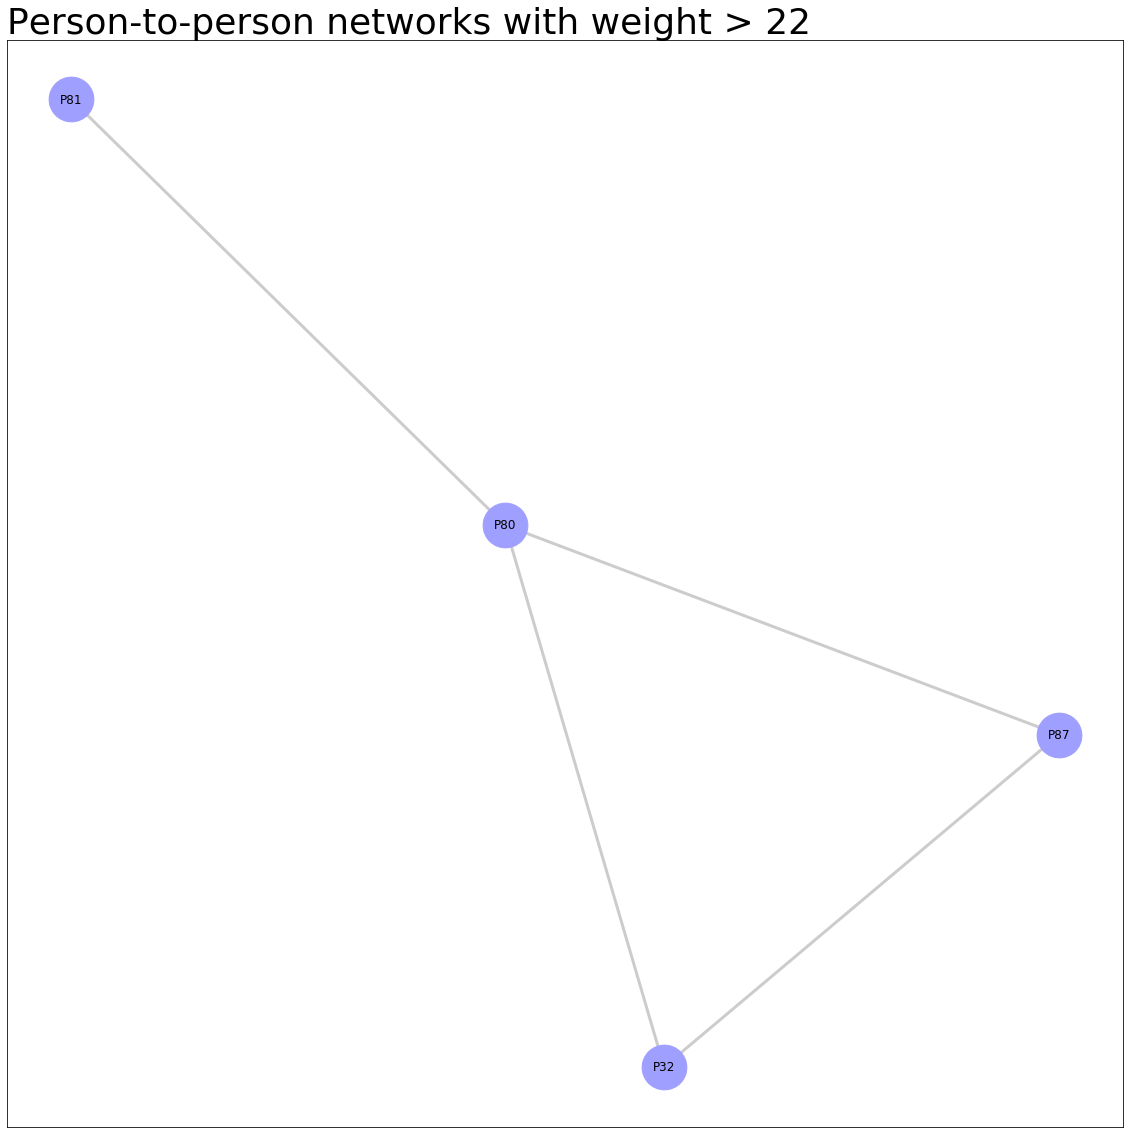

In [33]:
# Graph of islands [22 4 1]
ig = islands[3][1]
plot_person_node_graph(ig, fig_sz=(20,20))
ttl = plt.title('Person-to-person networks with weight > 22', loc = 'left', fontsize = 36)

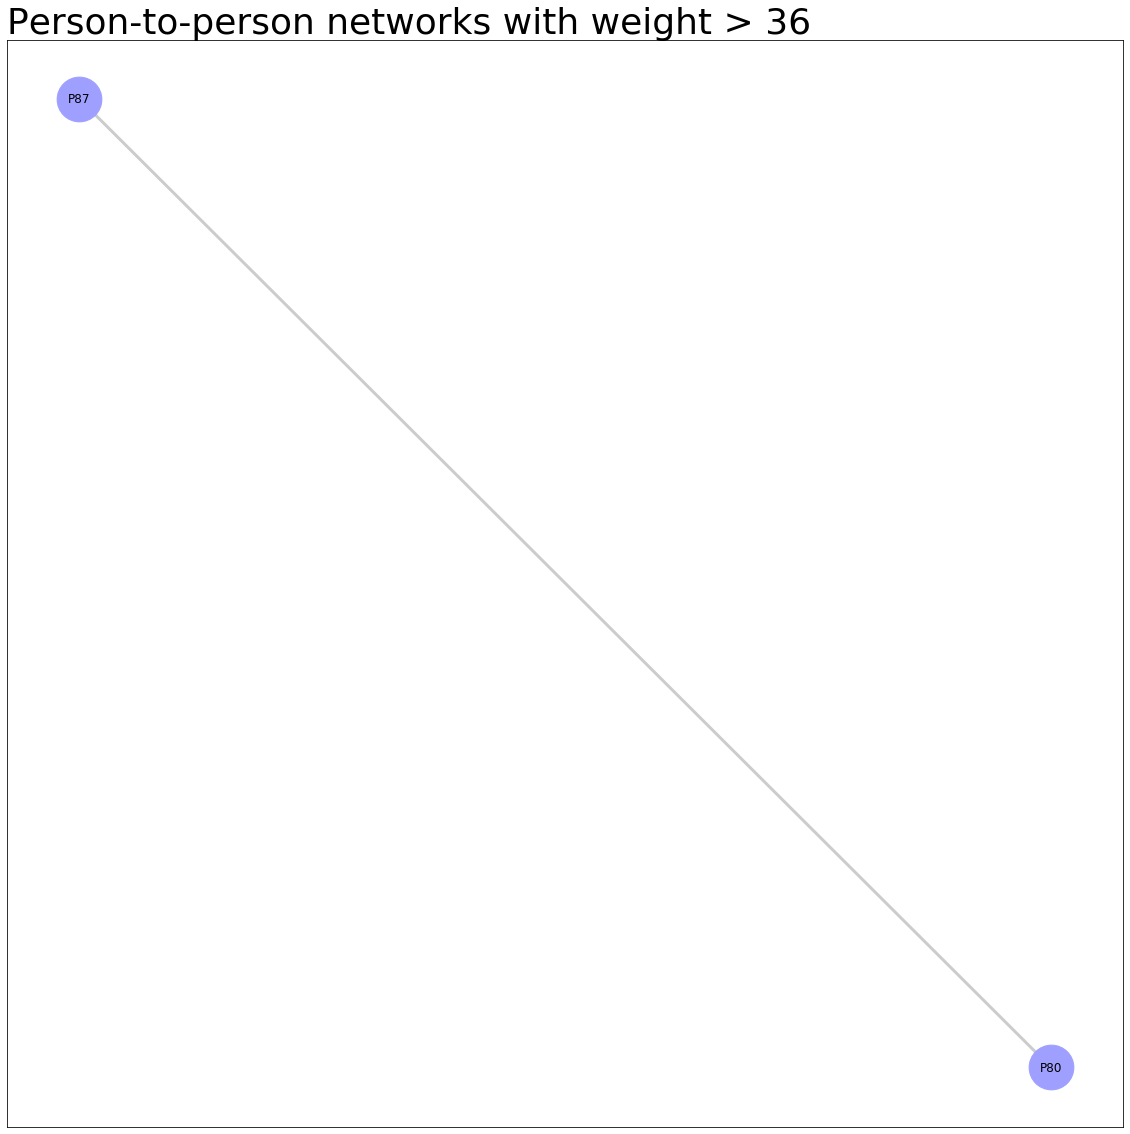

In [34]:
# Graph of islands [36 2 1]
ig = islands[5][1]
plot_person_node_graph(ig, fig_sz=(20,20))
ttl = plt.title('Person-to-person networks with weight > 36', loc = 'left', fontsize = 36)